# Hi!

Today we're going to talk about the mightiest buzzword of them all - **neural networks**. The topic is very complex and you should treat today only as an introduction you can and should follow up on. We're merely scratching the surface!

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

## But first - Logistic regression (again)


### A quick rewind
$$h_w(x) = \sigma(\sum_{j=0}^k x_j w_j ) = \sigma(xw)$$

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

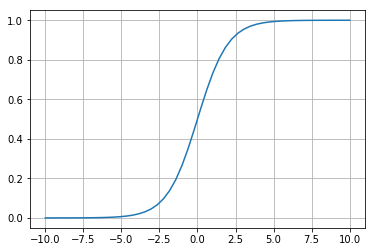

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.linspace(-10, 10)
plt.plot(x, sigmoid(x))
plt.grid(True)
plt.show()

Previously we introduced te topic of classification - essentially training our models to decide whether an example 'is' or 'isn't' something. But in real-life, such a binary use case is sometimes *just* not enough.

https://www.youtube.com/watch?v=ACmydtFDTGs

### Multiclass classification

To solve the problem of classifying an object as one of multiple classes, we do a one-vs-all prediction. 
Previously we calculated $h_w(x)$ and applied $sigmoid$ function to it, to calculate the 'probablility' of our example being positive or not. Since $\hat{y} \in [0,1]$ We chose a 'threshold' in that range below which we can treat our example as negative and above which - as positive.

For multiple classes, we must essentially calculate a hypothesis for **every single one** of possible categories. If hypothesis for a given category is high enough, there is a high probability that our object is of that category. In the other case, it means that it belongs to some other category (but we don't know which one - we need other hypotheses for that). 

![alt text](img/multiclass.PNG)
This is called one-versus-all classification. Ultimately we choose the category whose hypothesis has the highest probability.



### Before

Until now, a hypothesis $h_w(x^{(i)})$ for a given object $x^{(i)}$ represented as a vector of features $[x_0^{(i)}, x_1^{(i)}, ... x_k^{(i)}]$ was represented by a scalar:

$$h_w(x) = \sigma(\sum_{j=0}^k w_j x_j) = \sigma(wx)$$

Where w was a vector a weights. 

### Now

If $m$ is the number of possible categories, then for every vector of features we want to perform multiple logistic regressions (for every possible category we might classify it as). 
Essentially, for every vector of $k$ features we now want to obtain a vector of $m$ hypothesis scalars:

$$[x_0^{(i)}, x_1^{(i)}, ... x_k^{(i)}] \xrightarrow{\text{classification}} [h_0^{(i)}, h_1^{(i)}, ... h_m^{(i)}]$$


For every logistic regression we need a separate $k$-dimensional vector (or a $k \times 1$ matrix) of weights. 
If we want to vectorize our computations, we can merge all of the weights vectors into a single, $k \times m$ matrix.

### To sum it up
- $n$ - number of examples in the dataset (objects we want to classify)
- $k$ - number of features every object has
- $m$ - number of possible categories to classify as

$X$ - an $n \times k$ matrix representing the examples
$$
X = \begin{bmatrix}
x_0^{(1)} & x_1^{(1)}  &  & ...  &x_k^{(1)}\\ 
x_0^{(2)} &...  &  &...  & \\ 
... &  &  &...  & \\ 
x_0^{(n)} &  & ... &  & x_k^{(n)}
\end{bmatrix}
$$

$W$ - an $k \times m$ matrix representing weights in logistic regression for every feature in every category

\begin{bmatrix}
w_0^{(1)} & w_0^{(2)}  &  & ...  &w_0^{(m)}\\ 
w_1^{(1)} &...  &  &...  & \\ 
... &  &  &...  & \\ 
w_k^{(1)} &  & ... &  & w_k^{(m)}
\end{bmatrix}


$h_W(X)$ - an $n \times m$ matrix representing hypothesis vectors for every example and category 

$$
h_W(X) = \sigma(XW)
$$

We'll denote j-th hypothesis of i-th example as $$h_w^{(j)}(x^{(i)})$$
Computationally-wise, the only thing that changes is the $m$ dimension of W.


### As for cost function...

$$ L^{(j)}(w) = -\sum_{i=0}^n y^{(i,j)}\log{h_w^{(j)}(x^{(i)})} + (1-y^{(i,j)})\log{(1-h_w(x^{(i)}))}$$

We have a vector of cost values for every category $j$, which is useful in updating weights in gradient descent. If we want to plot the cost function, we can sum all those values.

#### WTF is $y^{(i,j)}$?

We can now look at y as a matrix of one-hot values. If $y^{(i,j)} = 1 $, then example $i$ is of class $j$. 

This also means the rest of values in $y^{(i)}$ are, of course, zeros.

